In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [16]:
# Transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Load datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize network
net = Net()

In [18]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizers
optimizers = {
    'SGD': optim.SGD(net.parameters(), lr=0.01),
    'RMSprop': optim.RMSprop(net.parameters(), lr=0.01),
    'Adagrad': optim.Adagrad(net.parameters(), lr=0.01),
    'Adam': optim.Adam(net.parameters(), lr=0.01)
}



# Losses dictionary
losses = {
    'SGD': [],
    'RMSprop': [],
    'Adagrad': [],
    'Adam': []
}

In [ ]:
# Training and storing losses
for name, optimizer in optimizers.items():
    print(f'Training with {name} optimizer')
    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics and store loss
            running_loss += loss.item()
            if i % 200 == 199:    # print every 200 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
                losses[name].append(running_loss / 200)
                running_loss = 0.0
    print('Finished Training')

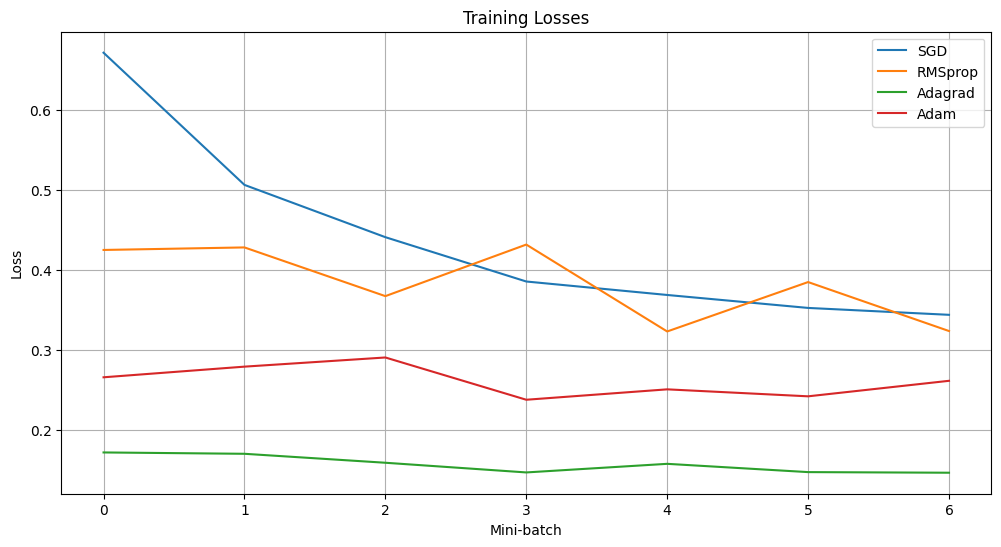

In [21]:
# Plotting
plt.figure(figsize=(12, 6))
for name, loss in losses.items():
    plt.plot(loss[1:], label=name)

plt.title('Training Losses')
plt.xlabel('Mini-batch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
